In [1]:
'''
Cleanly written notebook of python commands for producing blog figures
'''

'\nCleanly written notebook of python commands for producing blog figures\n'

In [2]:
# Initial library imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Import ALL data
## We will merge 'character_stats' and 'superheroes_power_matrix'

csv_files = !ls -1 'Marvel_Data'/Marvel-Superheroes/*.csv
csv_files

['Marvel_Data/Marvel-Superheroes/characters.csv',
 'Marvel_Data/Marvel-Superheroes/characters_stats.csv',
 'Marvel_Data/Marvel-Superheroes/charactersToComics.csv',
 'Marvel_Data/Marvel-Superheroes/comics.csv',
 'Marvel_Data/Marvel-Superheroes/hero-network.csv',
 'Marvel_Data/Marvel-Superheroes/marvel_characters_info.csv',
 'Marvel_Data/Marvel-Superheroes/marvel_dc_characters.csv',
 'Marvel_Data/Marvel-Superheroes/superheroes_power_matrix.csv']

In [4]:
# Example csv
pd.read_csv('Marvel_Data/Marvel-Superheroes/marvel_dc_characters.csv',encoding = "ISO-8859-1").head()

,ID,Name,Identity,Alignment,EyeColor,HairColor,Gender,Status,Appearances,FirstAppearance,Year,Universe
0,100001,Claude Potier (Earth-616),Secret,Neutral,Hazel,Brown,Male,Living,2.0,àå÷-00,2000.0,DC
1,100002,Elektra Natchios (Earth-616),Secret,Neutral,Blue,Black,Female,Living,280.0,éðå-81,1981.0,Marvel
2,100003,Thomas Williams (Earth-616),Secret,Neutral,Black,NaN,Male,Living,1.0,àåâ-02,2002.0,DC
3,100004,Mogul (Earth-616),NaN,NaN,NaN,Bald,NaN,Living,NaN,îàé-70,1970.0,DC
4,100005,Denise Havens (Earth-616),Secret,Good,Brown,Black,Female,Living,4.0,éðå-95,1995.0,DC


In [5]:
# Put all dataframes into a datafram dictionary: df_dict2
## 'First appearance' feature above in marvel_dc_characters needs special encoding, see above

df_dict2 = {}
for csv_f in csv_files: 
  k = csv_f.split('/')[-1]
  k = k.split('.')[0] #to get name with the csv extenstion
  #print(k)
  if[k=="marvel_dc_characters"]:
        df_dict2[k] = pd.read_csv(csv_f,encoding = "ISO-8859-1")
  else:
    df_dict2[k] = pd.read_csv(csv_f)
df_dict2.keys()

dict_keys(['characters', 'characters_stats', 'charactersToComics', 'comics', 'hero-network', 'marvel_characters_info', 'marvel_dc_characters', 'superheroes_power_matrix'])

In [6]:
# Shapes

print(df_dict2['characters'].shape, df_dict2['charactersToComics'].shape, df_dict2['characters_stats'].shape,"\n")

print(df_dict2['comics'].shape, df_dict2['hero-network'].shape, df_dict2['marvel_characters_info'].shape,"\n")

print(df_dict2['marvel_dc_characters'].shape, df_dict2['superheroes_power_matrix'].shape)

(1170, 2) (75257, 2) (611, 9) 

(41227, 4) (574466, 2) (734, 11) 

(39648, 12) (667, 168)


In [7]:
# Superpower list for each character. 168 total powers, we will not use so many for our model...
df_dict2['superheroes_power_matrix'].head()

,Name,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
# character_stats sample data
## notice: not all stats are included, we will count how many like this later...
df_dict2['characters_stats'].sample(10)

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
191,Destroyer,bad,50,95,58,98,90,70,461
238,Galactus,neutral,100,100,83,100,100,70,553
65,Beast,good,88,48,35,56,35,84,346
337,Leech,good,25,5,12,14,62,14,132
262,Green Goblin IV,good,1,1,1,1,0,1,5
397,Morph,good,1,1,1,1,0,1,5
556,Titan,good,1,1,1,1,0,1,5
312,Johann Krauss,good,1,1,1,1,0,1,5
340,Lightning Lad,good,38,10,23,28,60,42,201
92,Black Mamba,bad,75,10,35,42,78,65,305


In [9]:
# Watch out for FRANKLIN STORM, the only superhero with Power=0 and ACTUAL STATS
df_dict2['characters_stats'][(df_dict2['characters_stats']['Power']==0) & 
                             (df_dict2['characters_stats']['Intelligence']>1)]

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
235,Franklin Storm,good,38,10,1,1,0,10,60


In [10]:
# Merge data
super_data = df_dict2['characters_stats']
super_data = super_data.merge(df_dict2['superheroes_power_matrix'], on='Name')
super_data

,Name,Alignment,Intelligence_x,Strength,Speed,Durability_x,Power,Combat,Total,Agility,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,good,50,31,43,32,25,52,233,True,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,good,38,100,17,80,17,64,316,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,good,88,14,35,42,35,85,299,True,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,good,50,90,53,64,84,65,406,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,bad,63,80,53,90,55,95,436,False,...,False,False,False,False,False,False,False,False,False,False
5,Abraxas,bad,88,100,83,99,100,56,526,False,...,False,False,False,False,False,False,False,False,False,False
6,Adam Monroe,good,63,10,12,100,71,64,320,False,...,False,False,False,False,False,False,False,False,False,False
7,Adam Strange,good,1,1,1,1,0,1,5,False,...,False,False,False,False,False,False,False,False,False,False
8,Agent Bob,good,10,8,13,5,5,20,61,False,...,False,False,False,False,False,False,False,False,False,False
9,Agent Zero,good,75,28,38,80,72,95,388,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
# Our total observations = 519   
super_data.shape

(519, 176)

In [12]:
# 104 observations with NO STATS will need to impute
super_data[super_data['Power'] ==0].shape

(104, 176)

In [13]:
# We've now cut 39,648 total superhero characters in Marvel/DC-Comics Universe to only
#   519 characters with stats AND superpowers  :( 

# This list is mostly among the MOST popular characters in the superhero universe

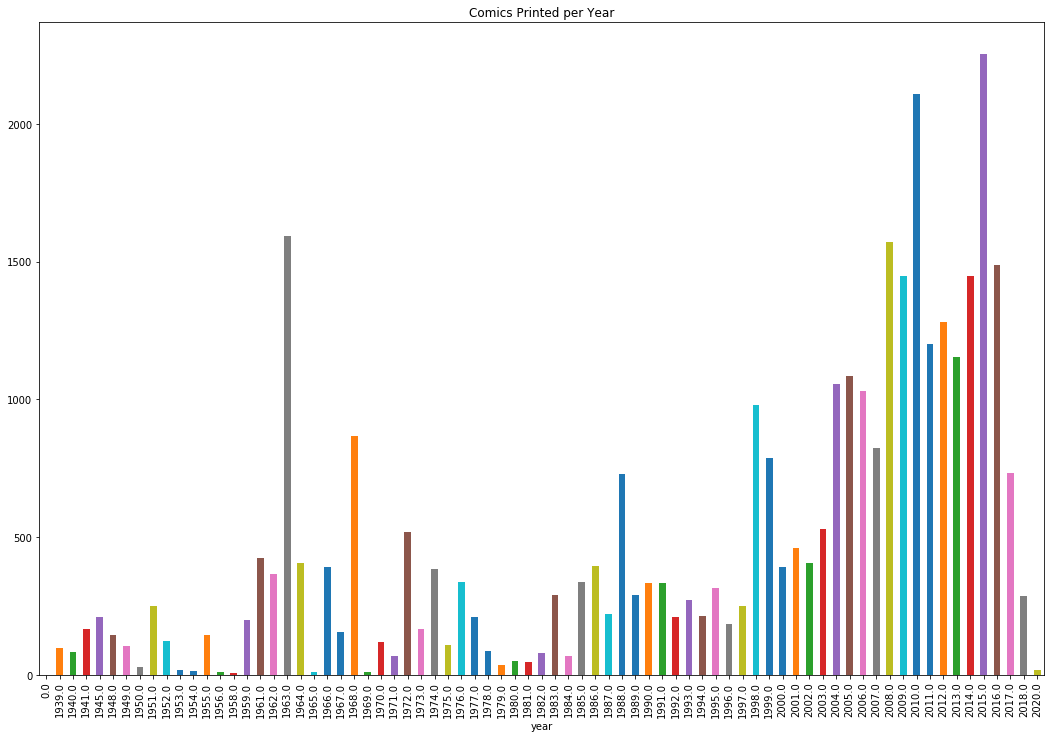

In [14]:
# Before we get started, let's see the publication years of our TOTAL comicbook dataset
# We see our comics span 1939-2019. An 80 year span!

#-----Unused-----------
## Creating a filter to find the comics with least 8 characters in 
comicsWith7orMoreCharacterFilter=df_dict2['charactersToComics'].groupby(by='comicID').count()['characterID']>7
## Applying the filter and find comics with 7+ characters in it
comicsWith7orMoreCharacterData=df_dict2['charactersToComics'].groupby(by='comicID').count()[comicsWith7orMoreCharacterFilter]
#-----Unused-----------

#Finding year of the comics
## First, creating a function to extract the year from comics title column
def extractYear(txt):
    startChr=txt.find('(')+1
    endChr=txt.find(')')
    try:
        result=int(txt[startChr:endChr])
        return result
    except:
        pass
    
# Creating a copy of comics data frame
comicsWyear=df_dict2['comics'].copy()

# Applying extractYear function and creating a new column that contains year of the comics
comicsWyear['year']=df_dict2['comics']['title'].apply(extractYear)

# Creating a bar chart
comicsWyear.groupby(by='year').count()['comicID'].plot(kind='bar',figsize=(18,12));
plt.title('Comics Printed per Year')

del comicsWyear

In [15]:
# Work in progress... need to show popularity of our tiny subsample as valid representation 
# of 'good' vs 'bad' divide.

# Improve model:  add popularity feature (comic book appearances)
#                 add 'year-character-created'

In [16]:
#super_data = super_data['Alignment'].replace('good','1')


In [17]:
# Before we move on...
## Three alginment types will be reduced to two 
## for more accurate labeling of data and to go easier on our model

# BEFORE
super_data['Alignment'].value_counts()

good       355
bad        150
neutral     11
Name: Alignment, dtype: int64

In [18]:
#AFTER
super_data['Alignment'] = super_data['Alignment'].apply(lambda x: 'bad' if x=="neutral" or x=="bad"  
                                                          else 'good')
super_data['Alignment'].value_counts()

good    358
bad     161
Name: Alignment, dtype: int64

In [19]:
mymap = {'good':0, 'bad':1}

super_data['Alignment'] = super_data['Alignment'].apply(lambda s: mymap.get(s) if s in mymap else s)
super_data['Alignment'].value_counts()

0    358
1    161
Name: Alignment, dtype: int64

In [20]:
# Getting a feel for our stats data...
## Let's first isolate for only data with data ... cutting ~20% data that we will return shortly
super_data_w_stats = super_data[super_data['Power'] != 0]
super_data_w_stats.shape

(415, 176)

Total power of 'bad' guys are greater than 'good' guys
           count       mean    sum
Alignment                         
0            287  312.38676  89655
1            128  340.50000  43584


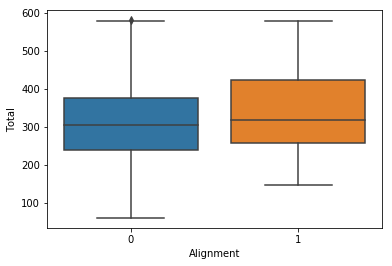

In [21]:
# Total power stat of our subsample of Heroes w Stats shows:
## 'bad' superheroes have higher stats

import seaborn as sns
#print(df_dict2['characters_stats'].groupby(by='Alignment').agg(['count','mean','sum'])['Total'])
print('Total power of \'bad\' guys are greater than \'good\' guys')
print(super_data_w_stats.groupby(by='Alignment').agg(['count','mean','sum'])['Total'])

sns.boxplot(x='Alignment',
           y='Total',
         #  data=df_dict2['characters_stats']);
           data=super_data_w_stats);

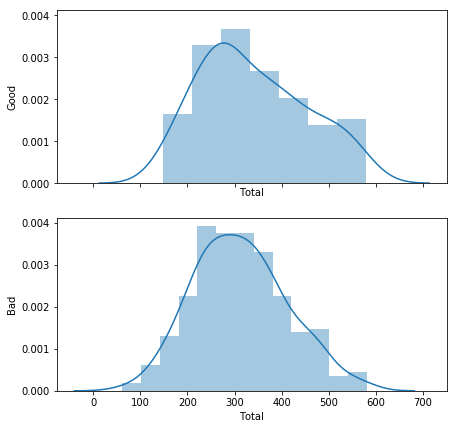

In [22]:
# Looking at the boxplot another way...

# Our stat distributions look mostly gaussian. 
# 'bad' types are slightly left-skewed: No weak bad guys, superstrong are restricted to bad

#Filter Good and Bad Guys
filterGood=super_data_w_stats['Alignment'].isin(['1'])
filterBad =super_data_w_stats['Alignment'].isin(['0'])

#Creating a figure for 2 plots
f,(ax1,ax2)=plt.subplots(2,1,figsize=(7,7), sharex=True, sharey=True);

#Plot the data and show the distribution
sns.distplot(super_data_w_stats[filterGood]['Total'],ax=ax1);
ax1.set_ylabel("Good");
sns.distplot(super_data_w_stats[filterBad]['Total'],ax=ax2);
ax2.set_ylabel("Bad");

In [23]:
# Individual stats show 'good' vs 'bad' discrepancy mostly exists in Intelligence, Strength, and Durability

stat_cols = ['Intelligence_x', 'Strength', 'Speed', 'Durability_x', 'Combat', 'Power']

super_data_w_stats [ super_data_w_stats['Alignment'] == 0][stat_cols].mean()

Intelligence_x    61.003484
Strength          38.742160
Speed             38.404181
Durability_x      57.421603
Combat            60.609756
Power             56.205575
dtype: float64

In [24]:
super_data_w_stats [ super_data_w_stats['Alignment'] == 1][stat_cols].mean()

Intelligence_x    67.210938
Strength          47.218750
Speed             38.710938
Durability_x      64.843750
Combat            61.328125
Power             61.187500
dtype: float64

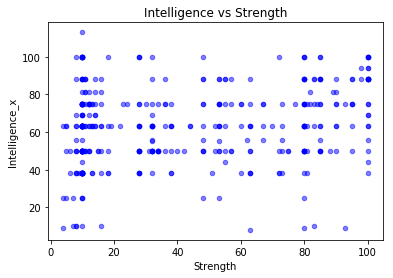

In [25]:
# A sample scatter plot to see rough feel for correlation of stats
super_data_w_stats.plot(kind='scatter', x='Strength',y='Intelligence_x',alpha=0.5,color='blue')
super_data_w_stats.xlabel1=('Strength')
super_data_w_stats.ylabel1=('Intelligence')
plt.title('Intelligence vs Strength');

In [26]:
# Now, let's switch to getting a feel of our superpowers
## See our 168 types of superpowers

superhero_powers = df_dict2['superheroes_power_matrix']
superpower_columns = list(superhero_powers.columns)
superpower_columns.remove('Name')

superpower_list = list(superhero_powers.columns)
superpower_list.sort()
superpower_list

['Accelerated Healing',
 'Adaptation',
 'Agility',
 'Animal Attributes',
 'Animal Control',
 'Animal Oriented Powers',
 'Animation',
 'Anti-Gravity',
 'Astral Projection',
 'Astral Travel',
 'Audio Control',
 'Banish',
 'Biokinesis',
 'Camouflage',
 'Changing Armor',
 'Clairvoyance',
 'Cloaking',
 'Cold Resistance',
 'Cryokinesis',
 'Danger Sense',
 'Darkforce Manipulation',
 'Death Touch',
 'Density Control',
 'Dexterity',
 'Dimensional Awareness',
 'Dimensional Travel',
 'Duplication',
 'Durability',
 'Echolocation',
 'Elasticity',
 'Electrical Transport',
 'Electrokinesis',
 'Element Control',
 'Elemental Transmogrification',
 'Empathy',
 'Energy Absorption',
 'Energy Armor',
 'Energy Beams',
 'Energy Blasts',
 'Energy Constructs',
 'Energy Manipulation',
 'Energy Resistance',
 'Enhanced Hearing',
 'Enhanced Memory',
 'Enhanced Senses',
 'Enhanced Sight',
 'Enhanced Smell',
 'Enhanced Touch',
 'Fire Control',
 'Fire Resistance',
 'Flight',
 'Force Fields',
 'Gliding',
 'Gravity Cont

In [27]:
# We'll want to cut some of our superpower features to limit our model for now
## We'll show the powers with less than 20 characters than hold them
## Preferable to keep and manage smartly for model

columns_to_remove=[]
for column in superpower_columns:
    if (int(superhero_powers[column].sum()) < 30):
        print(column, superhero_powers[column].sum())
        columns_to_remove.append(column)
        
print("\nWe will cut", len(columns_to_remove), "superpower features.")

Lantern Power Ring 11
Dimensional Awareness 25
Underwater breathing 21
Power Augmentation 8
Animal Attributes 25
Cryokinesis 19
Energy Armor 8
Duplication 16
Density Control 15
Astral Travel 4
Audio Control 7
Dexterity 6
Omnitrix 1
Possession 8
Electrokinesis 22
Darkforce Manipulation 10
Death Touch 7
Hyperkinesis 1
Clairvoyance 4
Dimensional Travel 23
Power Sense 3
Camouflage 21
Element Control 8
Astral Projection 29
Electrical Transport 1
Projection 2
Summoning 4
Enhanced Memory 25
Anti-Gravity 1
Empathy 19
Power Nullifier 4
Radiation Control 7
Elasticity 11
Substance Secretion 17
Elemental Transmogrification 6
Technopath/Cyberpath 23
Photographic Reflexes 3
Seismic Power 3
Animation 5
Precognition 22
Mind Control 22
Fire Resistance 18
Power Absorption 12
Nova Force 2
Insanity 5
Hypnokinesis 23
Animal Control 9
Intangibility 20
Enhanced Sight 25
Heat Generation 24
Adaptation 5
Gliding 10
Mind Blast 12
Probability Manipulation 9
Gravity Control 16
Regeneration 28
Light Control 15
Echo

In [28]:
# Work in progress ... try to show superpowers correlated to other superpowers 
#                                 AND superpowers correlated to good vs bad

In [29]:
# Now let's remind our superhero data
super_data

,Name,Alignment,Intelligence_x,Strength,Speed,Durability_x,Power,Combat,Total,Agility,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,0,50,31,43,32,25,52,233,True,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,0,38,100,17,80,17,64,316,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,0,88,14,35,42,35,85,299,True,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,0,50,90,53,64,84,65,406,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,1,63,80,53,90,55,95,436,False,...,False,False,False,False,False,False,False,False,False,False
5,Abraxas,1,88,100,83,99,100,56,526,False,...,False,False,False,False,False,False,False,False,False,False
6,Adam Monroe,0,63,10,12,100,71,64,320,False,...,False,False,False,False,False,False,False,False,False,False
7,Adam Strange,0,1,1,1,1,0,1,5,False,...,False,False,False,False,False,False,False,False,False,False
8,Agent Bob,0,10,8,13,5,5,20,61,False,...,False,False,False,False,False,False,False,False,False,False
9,Agent Zero,0,75,28,38,80,72,95,388,False,...,False,False,False,False,False,False,False,False,False,False


In [30]:
# Wrangle our data to impute stats for no-stat-characters and cut some superpowers


def wrangle(X):
    X = X.copy()
    
    # IMPUTATION
    stat_cols = ['Intelligence_x', 'Strength', 'Speed', 'Durability_x', 'Combat', 'Power']
    for col in stat_cols:
        impute_val = X[X['Power']!=0][col].mean()

        def impute_stat(row):
            if row['Power']==0:
                return impute_val
            else:
                return row[col]

        X[col] = X.apply(impute_stat, axis=1)

        if col==stat_cols[0]: 
            X['Total']=0
        X['Total'] = X['Total'] + X[col]
        
    # CUT SUPERPOWERS
    ## Remove superpower columns with num superheroes listed below cutoff  
    ## Should probably fix double-features 'Durability' and 'Intelligence' stats vs powers
    cutoff = 30
    superpower_columns = list(df_dict2['superheroes_power_matrix'].columns)
    superpower_columns.remove('Name')
    
    columns_to_remove=[]
    for col in superpower_columns:
       if (int(df_dict2['superheroes_power_matrix'][col].sum()) < cutoff):
           #print(col, superhero_powers[col].sum())
           columns_to_remove.append(col)
   
    X = X.drop(list(columns_to_remove),1)  
    
    return X

super_data_wrangled = wrangle(super_data)
super_data_wrangled

,Name,Alignment,Intelligence_x,Strength,Speed,Durability_x,Power,Combat,Total,Agility,...,Heat Resistance,Natural Weapons,Time Travel,Enhanced Smell,Illusions,Vision - Telescopic,Toxin and Disease Resistance,Telepathy Resistance,Wallcrawling,Vision - Night
0,3-D Man,0,50.000000,31.000000,43.000000,32.000000,25.000000,52.000000,233.000000,True,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,0,38.000000,100.000000,17.000000,80.000000,17.000000,64.000000,316.000000,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,0,88.000000,14.000000,35.000000,42.000000,35.000000,85.000000,299.000000,True,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,0,50.000000,90.000000,53.000000,64.000000,84.000000,65.000000,406.000000,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,1,63.000000,80.000000,53.000000,90.000000,55.000000,95.000000,436.000000,False,...,False,False,False,False,False,False,False,False,False,False
5,Abraxas,1,88.000000,100.000000,83.000000,99.000000,100.000000,56.000000,526.000000,False,...,False,False,False,False,False,False,False,False,False,False
6,Adam Monroe,0,63.000000,10.000000,12.000000,100.000000,71.000000,64.000000,320.000000,False,...,False,False,False,False,False,False,False,False,False,False
7,Adam Strange,0,62.918072,41.356627,38.498795,59.710843,57.742169,60.831325,321.057831,False,...,False,False,False,False,False,False,False,False,False,False
8,Agent Bob,0,10.000000,8.000000,13.000000,5.000000,5.000000,20.000000,61.000000,False,...,False,False,False,False,False,False,False,False,False,False
9,Agent Zero,0,75.000000,28.000000,38.000000,80.000000,72.000000,95.000000,388.000000,False,...,False,False,False,False,False,False,False,False,False,False


In [31]:
super_data_wrangled.shape

(519, 61)

In [32]:
super_data_wrangled.columns

Index(['Name', 'Alignment', 'Intelligence_x', 'Strength', 'Speed',
       'Durability_x', 'Power', 'Combat', 'Total', 'Agility',
       'Accelerated Healing', 'Cold Resistance', 'Durability_y', 'Stealth',
       'Energy Absorption', 'Flight', 'Danger Sense', 'Marksmanship',
       'Weapons Master', 'Longevity', 'Intelligence_y', 'Super Strength',
       'Telepathy', 'Energy Blasts', 'Size Changing', 'Stamina', 'Super Speed',
       'Animal Oriented Powers', 'Weapon-based Powers', 'Teleportation',
       'Enhanced Senses', 'Telekinesis', 'Energy Beams', 'Magic', 'Jump',
       'Shapeshifting', 'Peak Human Condition', 'Immortality', 'Phasing',
       'Fire Control', 'Reflexes', 'Invulnerability', 'Energy Constructs',
       'Force Fields', 'Self-Sustenance', 'Psionic Powers', 'Enhanced Hearing',
       'Natural Armor', 'Molecular Manipulation', 'Power Suit',
       'Energy Manipulation', 'Heat Resistance', 'Natural Weapons',
       'Time Travel', 'Enhanced Smell', 'Illusions', 'Vision - 

In [33]:
super_data_wrangled['Alignment'].value_counts()

0    358
1    161
Name: Alignment, dtype: int64

In [34]:
# MODEL TARGET = 'Alignment'

target = 'Alignment'
train = super_data_wrangled

X_train = train.drop(columns=target)
X_train = X_train.drop('Name',axis=1)
y_train = super_data_wrangled[target]
y_train.value_counts()

0    358
1    161
Name: Alignment, dtype: int64

In [35]:
# BASELINE ACCURACY

majority_class = y_train.mode()[0]
y_pred = [majority_class]*len(y_train)
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_pred)

0.6897880539499036

In [36]:
# Study model quality with train and val data. ( 80% train | 20% val )

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, 
                                                  stratify=train[target], random_state=42)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((415, 59), (104, 59), (415,), (104,))

In [37]:
# Check alignment proportion pt1
y_train.value_counts(normalize=True)

0    0.689157
1    0.310843
Name: Alignment, dtype: float64

In [38]:
# Check alignment proportion pt2
y_val.value_counts(normalize=True)

0    0.692308
1    0.307692
Name: Alignment, dtype: float64

In [39]:
# Initally, RANDOM FOREST MODEL

# By the way, if only 'stats'      columns are used, accuracy score = .70
#             if only 'superpower' columns are used, accuracy score = .64
# Therefore, inclusion of both features crucial for beating baseline model

In [40]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=1000, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)

accuracy_score(y_val,y_pred)

0.7307692307692307

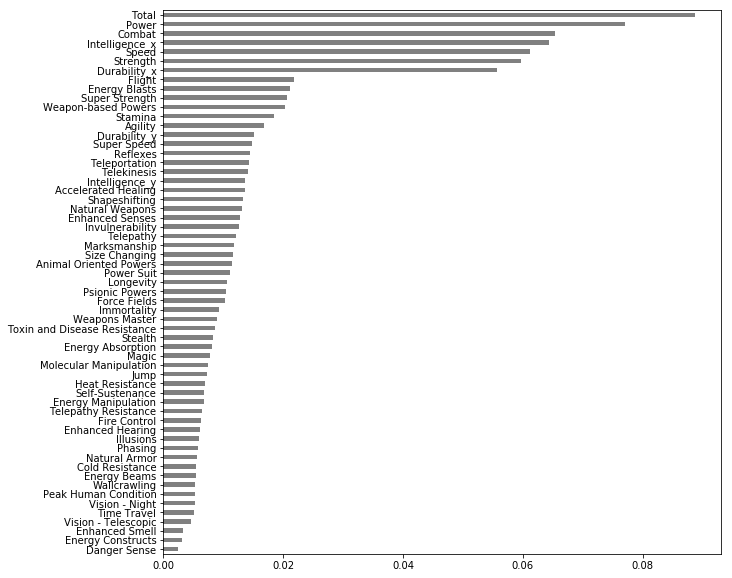

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
importances = pd.Series(model.feature_importances_, X_train.columns)
importances.sort_values().plot.barh(color='grey');

In [42]:
# Next, Improved model: XGBoost

In [43]:
from xgboost import XGBClassifier

eval_set = [
    (X_train, y_train),
    (X_val, y_val)
]

#model = XGBClassifier(n_estimators=2000, n_jobs=-1)

model = XGBClassifier(objective = 'multi:softmax', booster = 'gbtree', nrounds = 'min.error.idx', 
                      num_class = 3, maximize = False, eval_metric = 'merror', eta = .1,
                      max_depth = 20, colsample_bytree = .4, n_jobs = -1, random_state=42,
                     )

model.fit(X_train,y_train, 
         eval_set=eval_set,
         early_stopping_rounds=20
         )


[0]	validation_0-merror:0.13253	validation_1-merror:0.298077
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 20 rounds.
[1]	validation_0-merror:0.106024	validation_1-merror:0.288462
[2]	validation_0-merror:0.103614	validation_1-merror:0.307692
[3]	validation_0-merror:0.093976	validation_1-merror:0.317308
[4]	validation_0-merror:0.086747	validation_1-merror:0.288462
[5]	validation_0-merror:0.079518	validation_1-merror:0.288462
[6]	validation_0-merror:0.06747	validation_1-merror:0.269231
[7]	validation_0-merror:0.06506	validation_1-merror:0.269231
[8]	validation_0-merror:0.055422	validation_1-merror:0.278846
[9]	validation_0-merror:0.043373	validation_1-merror:0.288462
[10]	validation_0-merror:0.043373	validation_1-merror:0.278846
[11]	validation_0-merror:0.043373	validation_1-merror:0.269231
[12]	validation_0-merror:0.040964	validation_1-merror:0.278846
[13]	validation_0-merror:0.0385

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.4, eta=0.1,
       eval_metric='merror', gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=20, maximize=False, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=-1, nrounds='min.error.idx', nthread=None,
       num_class=3, objective='multi:softmax', random_state=42,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [44]:
# XGBOOST SCORE

y_pred = model.predict(X_val)
accuracy_score(y_val,y_pred)

0.75

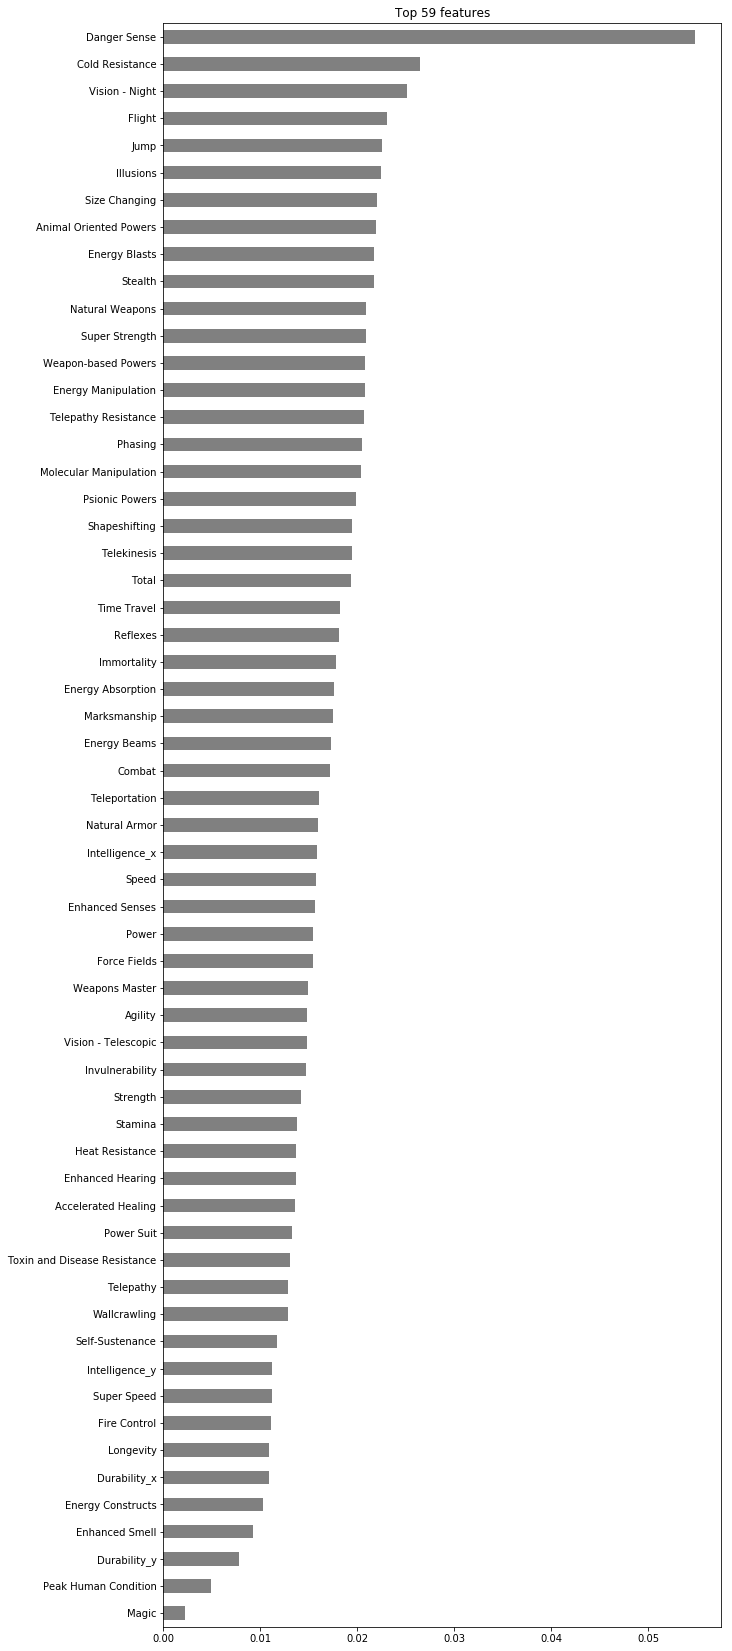

In [45]:
# Feature importance drastically changes upon hypertuning optimization is welcomed

importances = pd.Series(model.feature_importances_, X_train.columns)

# Plot feature importances
n = len(X_train.columns)
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='grey');

In [46]:
# Example of some strong predictors. Normally, good:bad ratio is about 2.4 : 1
## Strong predictor 1 - good:bad ratio almost 1 highly doesn't match blind ratio... 
train[train['Molecular Manipulation']==True]['Alignment'].value_counts()

0    18
1    16
Name: Alignment, dtype: int64

In [47]:
## Strong predictor 2 - high frequency superpower & 
##                      ratio of ~1.75 doesn't match blind good:ratio 
train[train['Super Strength']==True]['Alignment'].value_counts()

0    183
1    108
Name: Alignment, dtype: int64

In [48]:
# Weak predictor 
train[train['Cold Resistance']==True]['Alignment'].value_counts()

0    24
1     9
Name: Alignment, dtype: int64

In [49]:
# PERMUTATION IMPORTANCE
## (note: high errors)

import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(model, scoring='accuracy', 
                                 cv='prefit', n_iter=5, random_state=42)

permuter.fit(X_val, y_val)
feature_names = X_val.columns.tolist()
eli5.show_weights(permuter, top=None, feature_names=feature_names)

Weight,Feature
0.0558 ± 0.0224,Total
0.0231 ± 0.0335,Intelligence_x
0.0212 ± 0.0224,Reflexes
0.0192 ± 0.0344,Strength
0.0154 ± 0.0196,Durability_x
0.0154 ± 0.0154,Natural Weapons
0.0135 ± 0.0094,Invulnerability
0.0135 ± 0.0094,Telepathy
0.0135 ± 0.0154,Combat
0.0115 ± 0.0144,Flight


In [50]:
# Partial Dependece Plots (PDP)

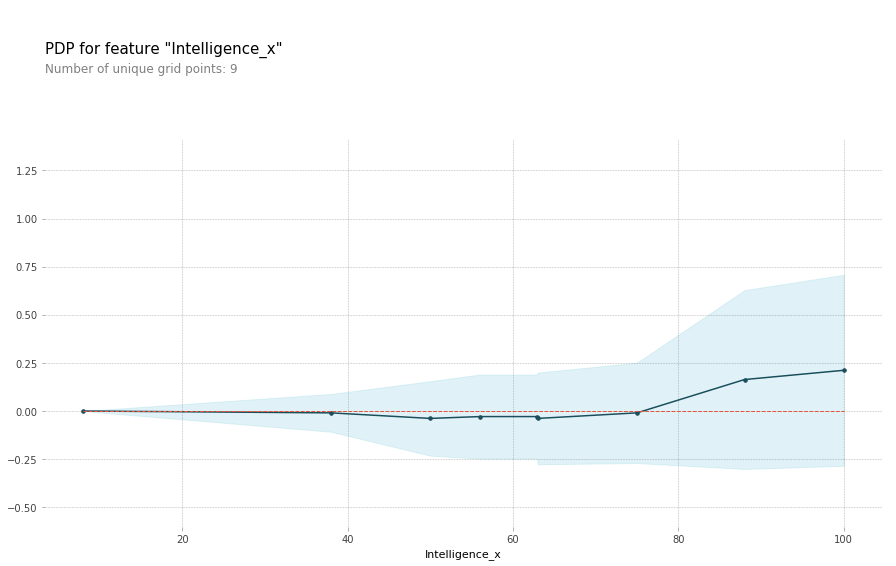

In [51]:
# PDP Intelligence
## Moderate intelligence suggests "good" alignment but high intelligence suggest "bad"

from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'Intelligence_x'

isolated = pdp_isolate(
    model=model, 
    dataset=X_val, 
    model_features=X_val.columns, 
    feature=feature
)

pdp_plot(isolated, feature_name=feature);

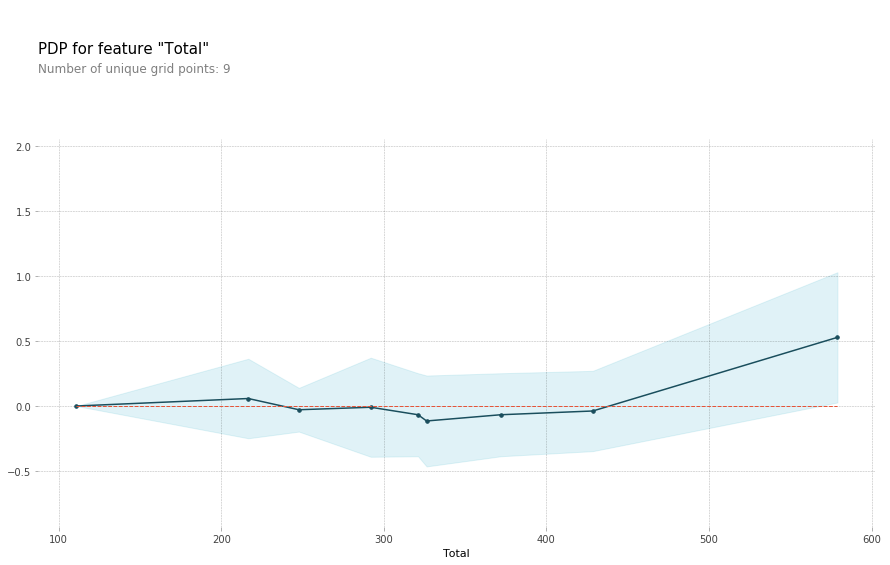

In [52]:
# PDP Total stat
## Total stat indicates super-duper statatiscally strong characters typically 'bad'

from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'Total'

isolated = pdp_isolate(
    model=model, 
    dataset=X_val, 
    model_features=X_val.columns, 
    feature=feature
)

pdp_plot(isolated, feature_name=feature);

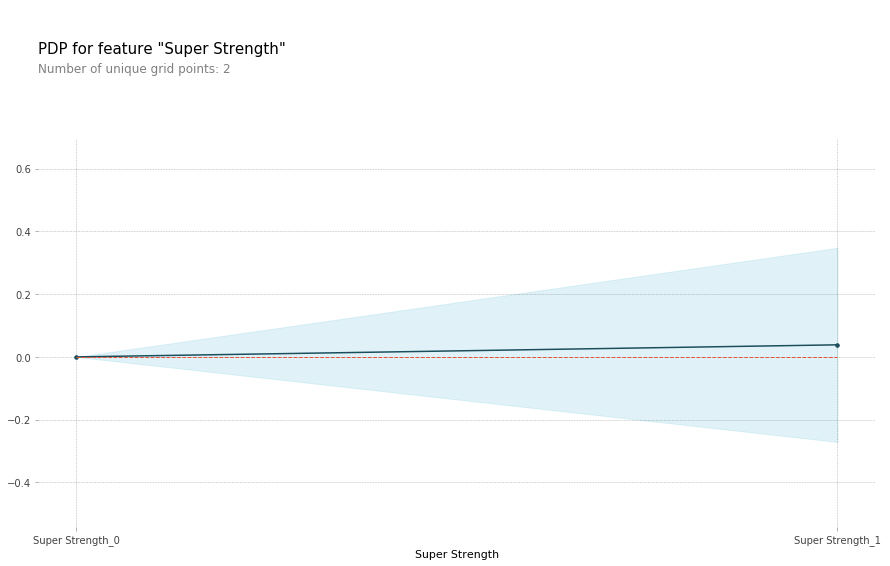

In [53]:
# PDP Super Strength power
## Superpower PDP's all show a small, high variance effect for prediction

from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'Super Strength'

isolated = pdp_isolate(
    model=model, 
    dataset=X_val, 
    model_features=X_val.columns, 
    feature=feature
)

pdp_plot(isolated, feature_name=feature);

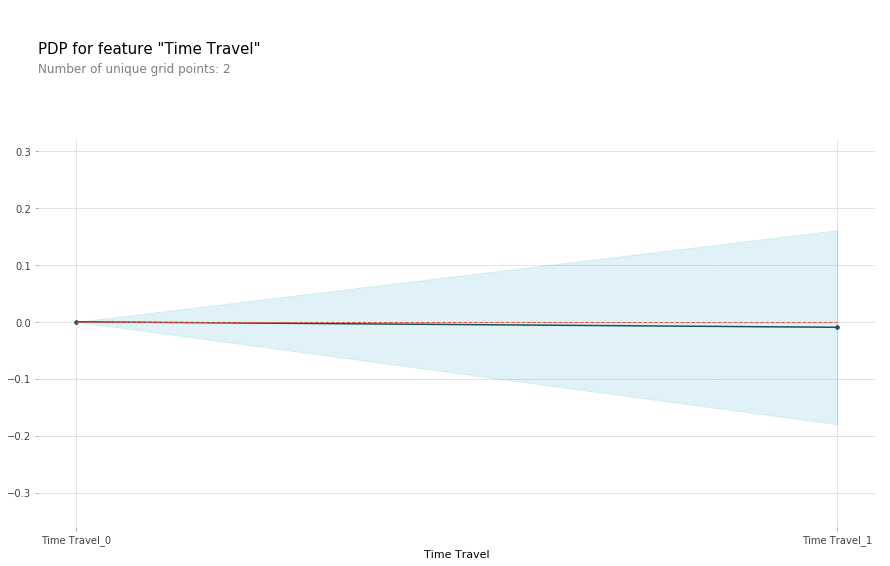

In [54]:
# PDP Super Strength power
## Superpower PDP's all show high variance in effect

from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'Time Travel'

isolated = pdp_isolate(
    model=model, 
    dataset=X_val, 
    model_features=X_val.columns, 
    feature=feature
)

pdp_plot(isolated, feature_name=feature);

In [55]:
#-------------------------DONE-----------------------------------------------#

In [56]:
# cross-validation ought to be performed for our small/median dataset

In [57]:
# Plotly-dash is work in progess... When user inputs stats/superpowers, 
# tell user their character is most like _______ (ex. Thanos i.e. similarity score _____ -> bad)

In [58]:
# Restrict this data to MARVEL data NOT DC-Comics

In [59]:
# Nemesis Predictor Model

In [60]:
# SHAPLEY PLOTS (still in development)
## Pick out some characters to briefly look at: Thanos, Spider-Man
## Preliminary test results show reverse of model expectation

In [61]:
df_dict2['characters_stats'][df_dict2['characters_stats']['Name']=='Thanos']

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
542,Thanos,bad,88,100,17,100,100,80,485


In [95]:
#data_for_prediction = X_train[101:102]
#data_for_prediction
data_for_prediction = X_train[73:74]
data_for_prediction

X_val[X_val['Strength']==100]
X_val[73:74]

,Intelligence_x,Strength,Speed,Durability_x,Power,Combat,Total,Agility,Accelerated Healing,Cold Resistance,...,Heat Resistance,Natural Weapons,Time Travel,Enhanced Smell,Illusions,Vision - Telescopic,Toxin and Disease Resistance,Telepathy Resistance,Wallcrawling,Vision - Night
464,88.0,100.0,17.0,100.0,100.0,80.0,485.0,True,True,True,...,True,False,False,False,False,False,True,True,False,False


In [96]:
#y_pred = model.predict(X_train[101:102])
y_pred = model.predict(X_train[73:74])
y_pred[0]

0

In [97]:
import shap
shap.initjs()
explainer = shap.TreeExplainer(model)

shap_values = explainer.shap_values(data_for_prediction)
shap_values

shap.force_plot(explainer.expected_value[0], shap_values[0], data_for_prediction)

In [103]:
df_dict2['characters_stats'][df_dict2['characters_stats']['Name']=='Spider-Man']

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
517,Spider-Man,good,88,55,60,74,58,85,420


In [106]:
data_for_prediction = X_train[171:172]
data_for_prediction
model.predict(X_train[171:172])

array([0])

In [67]:
y_pred = model.predict(X_train[171:172])
y_pred[0]

0

In [68]:
import shap
shap.initjs()
explainer = shap.TreeExplainer(model)

shap_values = explainer.shap_values(data_for_prediction)
shap_values

shap.force_plot(explainer.expected_value[0], shap_values[0], data_for_prediction)